### Overview Analysis

##### Global Plots
The global plots show an interesting lack of strong correlations. Data points for Humidity, cloudiness, and wind speed seem evenly spread across the latitudes with no apparent scheme. 
However, the scatter plot of temperate shows an interesting symmetry about the equator, suggesting
that any correlations that could be described linearly may be obscured by at the global level.

##### Hemispheric Plots - Correlations
The assertion made above is justified when these parameters are broken out by hemisphere and plotted
separately. Immediately, strong linear correlations are apparent, and r-squared values are much higher compared to the results of the global plots. 

##### Hemispheric - Symmetry
One remarkable feature of the hemispheric plots is their apparent symmetry. Temperature, Humidity, and Wind Speed all have correlations that are mirrored in either hemisphere. For instance, while temperature decreases with an increase in latitude in the northern hemisphere, it does the opposite in the southern one. This makes sense because primary factor determining the temperature in this plot
is the proximity to the equator. 
It is because of this that the comparison between northern and southern hemispheres' cloudiness is striking. In both of these, the correlation between latitude and cloudiness is positive. This contradicts the expectation of symmetry about the equator (latitude of 0.0). What I suspect might be driving this specific pattern is sunlight. During the daytime, cloud formation occurs at similar rates in both hemispheres, which explains why the slopes of both lines are so similar. Because of seaonsal differences, cloudiness is lower overall in the southern hemisphere where it is currently winter.

A caveat to this discussion is that only the regressions for the hemispheric plots of temperature had p-values less than 0.05 and r-squared values greater than 0.5. This means that even though trends and correlations are visible, in the case of most of these variables latitude is insufficient to explain most of the observed variability. 

In [1]:
# ensures citipy is installed
# !pip install citipy

In [2]:
# import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
from scipy.stats import linregress
from citipy import citipy
from config import api_key
from pprint import pprint
import csv 


In [25]:
# imports google maps api key
from gkey import g_key

In [18]:
# creates a function to create random coordinates 
def randcoord():
    randlat = random.randrange(-9000,9000,1)/100
    randlong = random.randrange(-18000,18000,1)/100
    coords = [randlat,randlong]
    return coords

In [4]:

# initialize variables and lists
cities = []
citykey = ['']
countries = []
lats = []
longs = []
drop_count = 0

# This loops and gets data for city sample data set
while len(cities) < 501:
    
    # selects random city
    coords = randcoord()
    city = citipy.nearest_city(coords[0], coords[1])
    city_name = city.city_name
    country_name = city.country_code
    citynatkey = city_name+country_name
    
    # attemps to get city coordinates, assesses data usability
    try:
        target_url = ('https://maps.googleapis.com/maps/api/geocode/json?'
        'locality={0}&address={0}&country=seychelles&key={2}').format(city_name,country_name, g_key)
        geo_data = requests.get(target_url).json()

        if geo_data['status'] == 'ZERO_RESULTS':
            mappable = False
        else:
            mappable = True
    except:
        mappable = False

    # Gets Country Code, if data available is usable.
    if mappable == True:
        for i in range((len(geo_data['results'][0]['address_components']))):
            if geo_data['results'][0]['address_components'][i]['types'][0] == 'country':
                country_code = geo_data['results'][0]['address_components'][i]['short_name'].lower()
    else:
        country_code = ''
        
    # Ensures API got the right city in the right country. 
    # Citipy doesn't have state/province, otherwise I'd check that too.
    if country_name == country_code:
        country_match = True
    else:
        country_match = False
        
    # If data is usable and data found applies to the correct country, append data to desired lists
    if mappable == True and country_match == True and max([i==citynatkey for i in citykey]) == False:
            
        cities.append(city.city_name)
        countries.append(country_name)
        lats.append(geo_data['results'][0]['geometry']['location']['lat'])
        longs.append(geo_data['results'][0]['geometry']['location']['lng'])
        
      # print(f"Adding {city_name},{country_name},{geo_data['results'][0]['geometry']['location']['lat']},{geo_data['results'][0]['geometry']['location']['lng']}")
        citykey.append(citynatkey) 
    else: 
        drop_count = drop_count+1
    
city_sample = {"city":cities, "country":countries, "lat":lats, "long":longs}
print(f"For the sake of accuracy {drop_count} cities were removed from sample.")


Adding sinnamary,gf,5.3746712,-52.9545991
Adding henties bay,na,-22.1134964,14.2832038
Adding puerto ayacucho,ve,5.6614718,-67.58277439999999
Adding geraldton,au,-28.7796535,114.6144452
Adding kodinsk,ru,58.60767269999999,99.1779093
Adding taolanaro,mg,-25.0225309,46.9853688
Adding saldanha,za,-33.0276981,17.9176312
Adding nikolskoye,ru,55.1981604,166.0015368
Adding novikovo,ru,46.3737648,143.36014
Adding genhe,cn,50.780344,121.5203881
Adding qaanaaq,gl,77.4670434,-69.2284827
Adding ostrovnoy,ru,68.0603191,39.4740385
Adding iskateley,ru,67.6766098,53.1295176
Adding illoqqortoormiut,gl,70.48556909999999,-21.9628757
Adding rikitea,pf,-23.1223034,-134.9691543
Adding severo-kurilsk,ru,50.6683424,156.115192
Adding ushuaia,ar,-54.8019121,-68.3029511
Adding kalaleh,ir,37.3833017,55.5025595
Adding waipawa,nz,-39.9416112,176.5896379
Adding kushiro,jp,42.9849413,144.3818041
Adding cape town,za,-33.9248685,18.4240553
Adding ayorou,ne,14.7328144,0.9104334
Adding yellowknife,ca,62.4539717,-114.3717

Adding attawapiskat,ca,52.9258846,-82.42889219999999
Adding raudeberg,no,61.9829131,5.1351059
Adding aksarka,ru,66.5583101,67.7877623
Adding bandarbeyla,so,9.498579999999999,50.8105261
Adding cuamba,mz,-14.8000877,36.5337731
Adding shubarshi,kz,48.5827715,57.1849343
Adding touros,br,-5.1961669,-35.4635381
Adding sitka,us,57.0530556,-135.33
Adding mar del plata,ar,-38.0054771,-57.5426106
Adding zabol,ir,31.0323677,61.4902483
Adding nome,us,30.03577,-94.42435719999999
Adding tiznit,ma,29.693392,-9.732156999999999
Adding savannah bight,hn,16.4851482,-85.85630069999999
Adding ust-kamchatsk,ru,56.22747,162.469299
Adding alta floresta,br,-9.8672231,-56.0870033
Adding amderma,ru,69.751221,61.6636961
Adding praia,cv,14.93305,-23.5133267
Adding tingo maria,pe,-9.2976466,-76.0000202
Adding puerto escondido,mx,15.8719795,-97.0767365
Adding tessalit,ml,20.2573532,0.9910297999999998
Adding grindavik,is,63.8441808,-22.4383818
Adding fairbanks,us,64.8377778,-147.7163888
Adding novyy urengoy,ru,66.095

Adding beira,mz,-19.8315949,34.8370183
Adding oistins,bb,13.0705904,-59.54695439999999
Adding merrill,us,36.07256390000001,-95.92347029999999
Adding stepnyak,kz,52.8324256,70.7926622
Adding vallenar,cl,-28.5757953,-70.7571009
Adding edeia,br,-17.3394091,-49.9342145
Adding san jeronimo,mx,31.713671,-106.4133507
Adding sabang,id,5.8926053,95.3237608
Adding angoche,mz,-16.2162656,39.914466
Adding iqaluit,ca,63.74669300000001,-68.5169669
Adding aksu,cn,41.167548,80.263387
Adding takoradi,gh,4.9015794,-1.7830973
Adding ambon,id,-3.6386665,128.1688559
Adding khandagayty,ru,50.736845,92.06527799999999
Adding pemangkat,id,1.1552999,108.985882
Adding abha,sa,18.2464685,42.5117238
Adding carutapera,br,-1.2097936,-46.022953
Adding lebedyn,ua,50.5837638,34.4904643
Adding cowra,au,-33.8281444,148.6778504
Adding kreminna,ua,49.04222679999999,38.2176555
Adding walvis bay,na,-22.9584081,14.5057511
Adding scottsburgh,za,-30.2862643,30.7551101
Adding kargopol,ru,61.2054851,38.7849276
Adding korla,cn,41.

In [5]:
# initializes lists for weather dataframe
temperatures = []
humidities = []
clouds = []
wind_speeds = []

# this loop grabs weather results for each city
for i in range(len(city_sample['city'])):
    url = f"http://api.openweathermap.org/data/2.5/weather?lat={city_sample['lat'][i]}&lon={city_sample['long'][i]}&appid={api_key}"
    
    try:
        # call to weather api
        print(f'Processing City {i} : {city_sample["city"][i]}, {city_sample["country"][i]}')
        output = requests.get(url).json()
        
        # retrieve weather results from json
        temp = output["main"]['temp'] # convert to fahrenheit
        humidity = output['main']['humidity'] #Percentage?
        cloudiness = output['clouds']['all'] # Percentage?
        wind = output['wind']['speed'] #mph?
        
        # convert temperature from K to F
        temp_c = temp - 273.15
        temp_f = temp_c*(9/5)+32
        
    except:
        # create dummy records for city not found
        print(f"Skipping City {i} - No data found for {city_sample['city'][i]}, {city_sample['country'][i]}")
        temp_f = 0 # convert to fahrenheit
        humidity = 0 #Percentage?
        cloudiness = 0 # Percentage?
        wind = 0 #mph?
    
    # append results to desired variables
    temperatures.append(temp_f)
    humidities.append(humidity)
    clouds.append(cloudiness)
    wind_speeds.append(wind)

Processing City 0 : sinnamary, gf
Processing City 1 : henties bay, na
Processing City 2 : puerto ayacucho, ve
Processing City 3 : geraldton, au
Processing City 4 : kodinsk, ru
Processing City 5 : taolanaro, mg
Processing City 6 : saldanha, za
Processing City 7 : nikolskoye, ru
Processing City 8 : novikovo, ru
Processing City 9 : genhe, cn
Processing City 10 : qaanaaq, gl
Processing City 11 : ostrovnoy, ru
Processing City 12 : iskateley, ru
Processing City 13 : illoqqortoormiut, gl
Processing City 14 : rikitea, pf
Processing City 15 : severo-kurilsk, ru
Processing City 16 : ushuaia, ar
Processing City 17 : kalaleh, ir
Processing City 18 : waipawa, nz
Processing City 19 : kushiro, jp
Processing City 20 : cape town, za
Processing City 21 : ayorou, ne
Processing City 22 : yellowknife, ca
Processing City 23 : kruisfontein, za
Processing City 24 : barrow, us
Processing City 25 : avarua, ck
Processing City 26 : airai, pw
Processing City 27 : punta arenas, cl
Processing City 28 : baykit, ru
Pr

Processing City 232 : el mahalla el kubra, eg
Processing City 233 : gambo, ca
Processing City 234 : boyarka, ua
Processing City 235 : zeya, ru
Processing City 236 : zhezkazgan, kz
Processing City 237 : tubruq, ly
Processing City 238 : flinders, au
Processing City 239 : dmitriyev-lgovskiy, ru
Processing City 240 : husavik, is
Processing City 241 : lithakia, gr
Processing City 242 : lucea, jm
Processing City 243 : faanui, pf
Processing City 244 : issy-les-moulineaux, fr
Processing City 245 : lida, by
Processing City 246 : manzhouli, cn
Processing City 247 : somerset, us
Processing City 248 : pevek, ru
Processing City 249 : fayaoue, nc
Processing City 250 : chifeng, cn
Processing City 251 : ishigaki, jp
Processing City 252 : chernyshevskiy, ru
Processing City 253 : sinkat, sd
Processing City 254 : sorland, no
Processing City 255 : huarmey, pe
Processing City 256 : samarai, pg
Processing City 257 : bafq, ir
Processing City 258 : shahrud, ir
Processing City 259 : lesogorsk, ru
Processing Ci

Processing City 463 : kattivakkam, in
Processing City 464 : dalton, us
Processing City 465 : upata, ve
Processing City 466 : sao joao da barra, br
Processing City 467 : gigmoto, ph
Processing City 468 : aykhal, ru
Processing City 469 : hofn, is
Processing City 470 : estelle, us
Processing City 471 : aasiaat, gl
Processing City 472 : solnechnyy, ru
Processing City 473 : motygino, ru
Processing City 474 : lazaro cardenas, mx
Processing City 475 : pousat, kh
Processing City 476 : esperance, au
Processing City 477 : freeport, us
Processing City 478 : pingliang, cn
Processing City 479 : kasongo, cd
Processing City 480 : kupang, id
Processing City 481 : wenling, cn
Processing City 482 : alyangula, au
Processing City 483 : kalispell, us
Processing City 484 : douglas, us
Processing City 485 : kigorobya, ug
Processing City 486 : isangel, vu
Processing City 487 : sabzevar, ir
Processing City 488 : wanganui, nz
Processing City 489 : gerash, ir
Processing City 490 : la ronge, ca
Processing City 49

In [17]:
# Adds weather data to city sample
city_sample['temperature'] = temperatures
city_sample['humidity'] = humidities
city_sample['cloudiness'] =  clouds
city_sample['wind speed'] = wind_speeds

In [7]:
# Create city dataframe with weather results
city_data = pd.DataFrame(city_sample)

# outputs weather data to a csv
city_data.to_csv('city_weather_data.csv')

In [8]:
# this function creates plots using city data.
# You can specify if you want to separate plots by hemisphere.

def regressplot(sample,dependent_variable,hemispherical = False):
    
    if hemispherical == False:
    # creates global plots
        xx = sample['lat']
        yy = sample[dependent_variable]
        
        (slope,intercept,rval,pval,stderr) = linregress(xx,yy)
        y_out = xx*slope + intercept
        equation = f'y = {slope}x + {intercept}'
        
       
        plt.scatter(xx,yy,alpha=.5)
        plt.plot(xx,y_out,color = 'teal', alpha = .6)
        
        plt.title(f'latitude vs. {dependent_variable}')
        plt.ylabel(f'{dependent_variable}')
        plt.xlabel('latitude (degrees)')
        
        print(f'''
        Equation : {equation}
        R-Squared : {rval**2}
        P-Value : {pval}
        ''')
        
    else:
    # Creates Hemispherial plots
    
        # Separate data by hemispheres
        north = sample.loc[sample['lat'] >= 0]
        south = sample.loc[sample['lat'] < 0]
        ymin = sample[dependent_variable].min()
        ymax = sample[dependent_variable].max()
        
        x_north = north['lat']
        y_north = north[dependent_variable]
        
        x_south = south['lat']
        y_south = south[dependent_variable]
        
        # Northern Hemisphere
        (slope_north,intercept_north,rval_north,pval_north,stderr_north) = linregress(x_north,y_north)
        y_out_north = x_north*slope_north + intercept_north
        equation_north = f'y = {slope_north}x + {intercept_north}'
        
        # Southern Hemisphere
        (slope_south,intercept_south,rval_south,pval_south,stderr_south) = linregress(x_south,y_south)
        y_out_south = x_south*slope_south + intercept_south
        equation_south = f'y = {slope_south}x + {intercept_south}'

        #create and format plots
        plt.subplot(1, 2, 2)
        plt.scatter(x_north,y_out_north,alpha=.3)
        plt.plot(x_north,y_out_north,color = 'red', alpha = .6)
        
        plt.ylim(ymin,ymax)
        plt.ylabel(f'{dependent_variable}')
        plt.title(f'Northern Hemisphere')
        plt.xlabel('latitude (degrees)')
        
        plt.subplot(1, 2, 1)
        plt.scatter(x_south,y_out_south,alpha=.3)   
        plt.plot(x_south,y_out_south,color = 'red', alpha = .6)
        
        plt.ylim(ymin,ymax)
        plt.title(f'Southern Hemisphere')
        plt.xlabel('latitude (degrees)')
        
        print(f'''
        Northern Heisphere:
        Equation : {equation_north}
        R-Squared : {rval_north**2}
        P-Value : {pval_north}
        
        Southern Hemisphere:
        Equation : {equation_south}
        R-Squared : {rval_south**2}
        P-Value : {pval_south}
        ''')


##### Global - Latitude versus Temperature


        Equation : y = -0.08191225257818346x + 68.55792801119414
        R-Squared : 0.033771182866562326
        P-Value : 3.498334155751697e-05
        


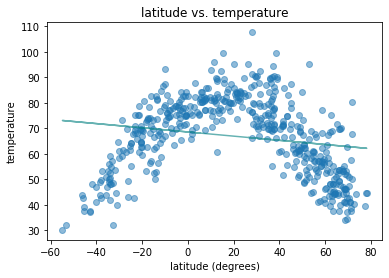

In [9]:
regressplot(city_data,'temperature')
plt.savefig('Images/LatVsTemperature.png')

The plot above shows latitude versus temperature. It shows an approximate symmetry the equator.

##### Global - Latitude versus Humidity



        Equation : y = -0.01651085745729217x + 71.6594085309756
        R-Squared : 0.0007598511519538755
        P-Value : 0.5381764406577743
        


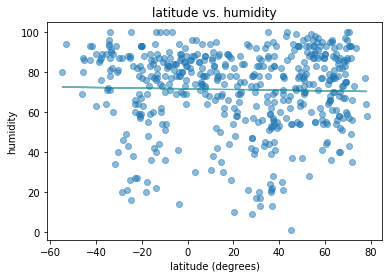

In [10]:
regressplot(city_data,'humidity')
plt.savefig('Images/LatVsHumidity.png')

The plot above shows latitude versus humidity. It shows no apparent correlation, positive or negative.

##### Global - Latitude versus Cloudiness


        Equation : y = 0.19247201395565255x + 45.98361136583245
        R-Squared : 0.027125927948830748
        P-Value : 0.0002134177394962295
        


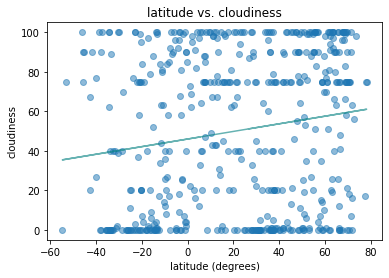

In [11]:
regressplot(city_data,'cloudiness')
plt.savefig('Images/LatVsCloudiness.png')

The plot above shows latitude versus cloudiness. The regression suggests a weak positive correlation across all latitudes.

##### Global - Latitude versus Wind Speed


        Equation : y = 0.00723687742000815x + 3.621549799856153
        R-Squared : 0.008536182432016629
        P-Value : 0.038709792834129245
        


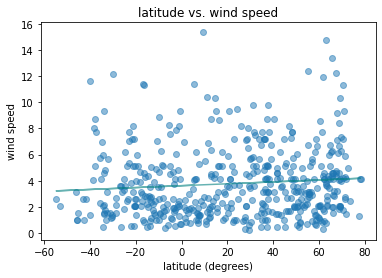

In [12]:
regressplot(city_data,'wind speed')
plt.savefig('Images/LatVsWindspeed.png')

The plot above shows latitude versus wind speed. The regression suggests a weak positive correlation across all latitudes, though no clear directional trend is visible in the plot.

##### Hemispheric - Latitude versus Temperature


        Northern Heisphere:
        Equation : y = -0.5758913760578727x + 91.24483130342952
        R-Squared : 0.5937104243269827
        P-Value : 1.77948668243097e-68
        
        Southern Hemisphere:
        Equation : y = 0.8719647480767831x + 81.7888217425776
        R-Squared : 0.6763595422537029
        P-Value : 2.6720388414111115e-40
        


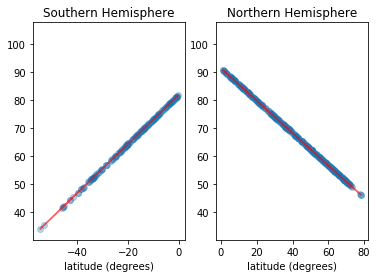

In [13]:
regressplot(city_data,'temperature',hemispherical=True)
plt.savefig('Images/LatVsTemperatureByHemisphere.png')

The plots above show latitude versus temperature broken out by hemisphere. The scatter plots show clear correlations, both increasing as approaching the equator (latitude 0.0)

##### Hemispheric - Latitude versus Humidity


        Northern Heisphere:
        Equation : y = 0.06504927312699847x + 67.78696468703905
        R-Squared : 0.0045258350375438515
        P-Value : 0.21461615746737014
        
        Southern Hemisphere:
        Equation : y = -0.07262929137478727x + 71.7009411041167
        R-Squared : 0.0021263229566758895
        P-Value : 0.5638243207843063
        


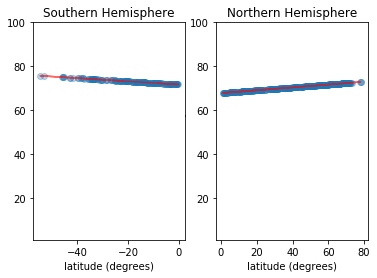

In [14]:
regressplot(city_data,'humidity',hemispherical=True)
plt.savefig('Images/LatVsHumidityByHemisphere.png')

The plots above show latitude versus humidity broken out by hemisphere. The scatter plots show clear correlations, both decreasing as approaching the equator (latitude 0.0).

##### Hemispheric - Latitude versus Cloudiness


        Northern Heisphere:
        Equation : y = 0.07174570134318221x + 51.968028583275384
        R-Squared : 0.0015189010923187904
        P-Value : 0.4725274029479052
        
        Southern Hemisphere:
        Equation : y = 0.07351859535534516x + 41.48600859059516
        R-Squared : 0.000562084149322635
        P-Value : 0.7667464225018236
        


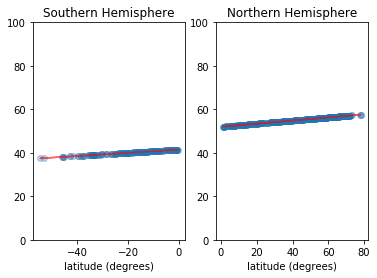

In [27]:
regressplot(city_data,'cloudiness',hemispherical=True)
plt.savefig('Images/LatVsCloudinessByHemisphere.png')

The plots above show latitude versus cloudiness broken out by hemisphere. The scatter plots show clear correlations, both increasing as latitude increases.

##### Hemispheric - Latitude versus Wind Speed


        Northern Heisphere:
        Equation : y = 0.01141781648351982x + 3.4389311681074037
        R-Squared : 0.00793969912169723
        P-Value : 0.09995312338760208
        
        Southern Hemisphere:
        Equation : y = -0.008359917376020973x + 3.344362118741709
        R-Squared : 0.0017585794858073797
        P-Value : 0.5996914557260418
        


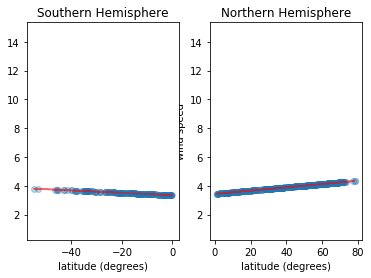

In [16]:
regressplot(city_data,'wind speed',hemispherical=True)
plt.savefig('Images/LatVsWindspeedByHemisphere.png')

The plots above show latitude versus wind speed broken out by hemisphere. The scatter plots show clear correlations, both decreasing as approaching the equator (latitude 0.0).